In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np

In [9]:
df_train = pd.read_csv('/Users/tinaschendt/downloads/train.csv')

In [10]:
df_test = pd.read_csv('/Users/tinaschendt/downloads/test.csv')

In [11]:
df_spray = pd.read_csv('/Users/tinaschendt/downloads/spray.csv')

In [12]:
df_weather = pd.read_csv('/Users/tinaschendt/downloads/weather.csv')

In [13]:
#Training data Column Na
# train.csv, test.csv - the training and test set of the main dataset. T
#The training set consists of data from 2007, 2009, 2011, and 2013, 
#while in the test set you are requested to predict the test results for 2008, 2010, 2012, 
#and 2014.
# Id: the id of the record
# Date: date that the WNV test is performed
# Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
# Species: the species of mosquitos
# Block: block number of address
# Street: street name
# Trap: Id of the trap
# AddressNumberAndStreet: approximate address returned from GeoCoder
# Latitude, Longitude: Latitude and Longitude returned from GeoCoder
# AddressAccuracy: accuracy returned from GeoCoder
# NumMosquitos: number of mosquitoes caught in this trap
# WnvPresent: whether West Nile Virus was present in these mosquitos. 
#1 means WNV is present, and 0 means not present. 


In [1]:
# df_train.head()

In [4]:
# df_train.Trap.value_counts()

In [8]:
y = df_train.WnvPresent

In [9]:
y.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [10]:
#baseline accuracy
y.value_counts() / len(y)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [11]:
df_train['Date'] = pd.to_datetime(df_train.Date)

In [14]:
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [27]:
df_train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [13]:
# df_train.groupby(['Species', 'WnvPresent']).count()


Date  Address  Block  Street  Trap  \
Species                WnvPresent                                       
CULEX ERRATICUS        0              1        1      1       1     1   
CULEX PIPIENS          0           2459     2459   2459    2459  2459   
                       1            240      240    240     240   240   
CULEX PIPIENS/RESTUANS 0           4490     4490   4490    4490  4490   
                       1            262      262    262     262   262   
CULEX RESTUANS         0           2691     2691   2691    2691  2691   
                       1             49       49     49      49    49   
CULEX SALINARIUS       0             86       86     86      86    86   
CULEX TARSALIS         0              6        6      6       6     6   
CULEX TERRITANS        0            222      222    222     222   222   

                                   AddressNumberAndStreet  Latitude  \
Species                WnvPresent                                     
CULEX ERRATICUS        0                                1         1   
CULEX PIPIENS          0                             2459      2459   
                       1                              240       240   
CULEX PIPIENS/RESTUANS 0                             4490      4490   
                       1                              262       262   
CULEX RESTUANS         0                             2691      2691   
                       1                               49        49   
CULEX SALINARIUS       0                               86        86   
CULEX TARSALIS         0                                6         6   
CULEX TERRITANS        0                              222       222   

                                   Longitude  AddressAccuracy  NumMosquitos  
Species                WnvPresent                                            
CULEX ERRATICUS        0                   1                1             1  
CULEX PIPIENS          0                2459             2459          2459  
                       1                 240              240           240  
CULEX PIPIENS/RESTUANS 0                4490             4490          4490  
                       1                 262              262           262  
CULEX RESTUANS         0                2691             2691          2691  
                       1                  49               49            49  
CULEX SALINARIUS       0                  86               86            86  
CULEX TARSALIS         0                   6                6             6  
CULEX TERRITANS        0                 222              222           222

In [15]:
#df_train.groupby(['Trap', 'WnvPresent', 'Block']).count()

df_test.head()

In [16]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [17]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [18]:
df_weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [19]:
df_train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [20]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_train)

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
#print "Missing values per column:"
#print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column


missing values 
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=10506, step=1)
dataframe types 
Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object
dataframe shape 
(10506, 12)
dataframe describe 
      

In [21]:
df_train['year'] = df_train['Date'].dt.year
df_train['month'] = df_train['Date'].dt.month

In [22]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5


In [23]:
df_2007 = df_train[df_train.year == 2007]

In [25]:
df_2007.year.unique()

array([2007])

In [26]:
df_2009 = df_train[df_train.year == 2009]

In [28]:
df_2011 = df_train[df_train.year == 2011]

In [29]:
df_2013 = df_train[df_train.year == 2013]

In [32]:
df_2007[df_2007.WnvPresent == 1].count()

Date                      236
Address                   236
Species                   236
Block                     236
Street                    236
Trap                      236
AddressNumberAndStreet    236
Latitude                  236
Longitude                 236
AddressAccuracy           236
NumMosquitos              236
WnvPresent                236
year                      236
month                     236
dtype: int64

In [33]:
df_2009[df_2009.WnvPresent == 1].count()

Date                      19
Address                   19
Species                   19
Block                     19
Street                    19
Trap                      19
AddressNumberAndStreet    19
Latitude                  19
Longitude                 19
AddressAccuracy           19
NumMosquitos              19
WnvPresent                19
year                      19
month                     19
dtype: int64

In [34]:
df_2011[df_2011.WnvPresent == 1].count()

Date                      57
Address                   57
Species                   57
Block                     57
Street                    57
Trap                      57
AddressNumberAndStreet    57
Latitude                  57
Longitude                 57
AddressAccuracy           57
NumMosquitos              57
WnvPresent                57
year                      57
month                     57
dtype: int64

In [36]:
df_2013[df_2013.WnvPresent == 1].count()

Date                      239
Address                   239
Species                   239
Block                     239
Street                    239
Trap                      239
AddressNumberAndStreet    239
Latitude                  239
Longitude                 239
AddressAccuracy           239
NumMosquitos              239
WnvPresent                239
year                      239
month                     239
dtype: int64

In [45]:
df_2007.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,20
11,15
12,36
13,4
14,2
15,3
17,2
18,0
20,1


In [46]:
df_2009.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,5
11,2
12,0
13,1
14,0
15,0
17,0
22,0
24,0


In [47]:
df_2011.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,27
11,1
12,1
13,1
14,0
17,1
22,0
24,0
25,0


In [48]:
df_2013.groupby('Block')['WnvPresent'].agg([('WnvPresent==1', 'sum')])



,WnvPresent==1
Block,
10,59
11,8
12,4
13,5
14,3
17,8
21,1
22,11
24,2


In [70]:
df_train.Block.unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34])

In [74]:
df_train['lat_long'] = list(zip(df_train.Latitude, df_train.Longitude))

In [11]:
df_location = df_train.loc[:, ['Trap', 'Latitude', 'Longitude']]

In [12]:
df_location.head()

,Trap,Latitude,Longitude
0,T002,41.954690,-87.800991
1,T002,41.954690,-87.800991
2,T007,41.994991,-87.769279
3,T015,41.974089,-87.824812
4,T015,41.974089,-87.824812


In [13]:
df_location['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [17]:
Trap = df_location.groupby(['Trap'])

In [20]:
Trap.head()

,Trap,Latitude,Longitude
0,T002,41.954690,-87.800991
1,T002,41.954690,-87.800991
2,T007,41.994991,-87.769279
3,T015,41.974089,-87.824812
4,T015,41.974089,-87.824812
5,T045,41.921600,-87.666455
6,T046,41.891118,-87.654491
7,T048,41.867108,-87.654224
8,T048,41.867108,-87.654224
9,T049,41.896282,-87.655232


In [75]:
# import gmplot

# gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

# gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
# gmap.heatmap(heat_lats, heat_lngs)

# gmap.draw("mymap.html")

In [3]:
df_spray['Geo'] = df_spray['Latitude'].map(str) + ', ' + df_spray["Longitude"].map(str)

In [5]:
geolocator = Nominatim()

In [7]:
results = geolocator.reverse('42.3916233333, -88.0891633333')


In [8]:
results.address

u'Ridgewood Lane, Lake Villa, Lake County, Illinois, 60073, United States of America'

In [5]:
all_data = pd.read_csv('/Users/natalie/Desktop/GA/Project-4/WestNileProject/all_data.csv')

In [6]:
all_data.head()

,Address,AddressAccuracy,AddressNumberAndStreet,AvgSpeed,Block,CodeSum,Cool,Date,Depart,Depth,...,Water1,WetBulb,WnvPresent,day,id,month,newdate,spray,trap,year
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",NaN,41.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",NaN,41.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
2,"6200 North Mandell Avenue, Chicago, IL 60646, USA",9.0,"6200 N MANDELL AVE, Chicago, IL",NaN,62.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
3,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",NaN,79.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0
4,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",NaN,79.0,NaN,NaN,2007-05-29,NaN,NaN,...,NaN,NaN,0.0,29.0,NaN,5.0,2007-05-29,NaN,NaN,2007.0


In [36]:
df = pd.read_csv('/Users/natalie/Downloads/Modeldf2.csv')

In [4]:
df.head()

,WnvPresent,NumMosquitos,Last7Average_Windspeed,Last7Average_Temp,Last7Total_Rainfall,month,T002,T003,T004,T005,...,T237,T238,T900,T903,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0.76,68.285714,9.821429,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,4,0.76,68.285714,9.821429,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import auc, roc_curve
from bs4 import BeautifulSoup
import pandas as pd
# import requests
import xgboost
import re


/Users/natalie/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# first we tried a random forest to look at feature importance

In [3]:
y = df['WnvPresent']
dfX = df.drop('WnvPresent', 1)


NameError: name 'df' is not defined

In [39]:
X = dfX
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

In [40]:
dt = RandomForestClassifier(n_estimators=1000, min_samples_split= 2, random_state= 42)
dt.fit(X,y)
s = cross_val_score(dt, X, y, cv=cv)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3))

Random Forest with Balanced Classes Score:	0.944 ± 0.0


In [41]:
importance_dataframe_big = pd.DataFrame(dt.feature_importances_, X.columns, columns=['importance']).sort_values('importance', ascending=False)
importance_dataframe_big.to_csv('States_for_Tabby.csv',index = False)
importance_dataframe_big.head(100)

,importance
NumMosquitos,0.251802
Last7Average_Temp,0.086394
Last7Total_Rainfall,0.084436
Last7Average_Windspeed,0.083983
month,0.044791
CULEX PIPIENS,0.020233
CULEX PIPIENS/RESTUANS,0.018246
T900,0.016121
CULEX RESTUANS,0.011447
T002,0.010826


# THIS IS WHERE WE FIT OUR MODELS WITH XGBOOST FORST WITH OUR FIRST FRAME

In [6]:
import xgboost as xgb
from IPython.display import display
from matplotlib import pyplot
from sklearn.grid_search import GridSearchCV


/Users/natalie/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


/Users/natalie/anaconda/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


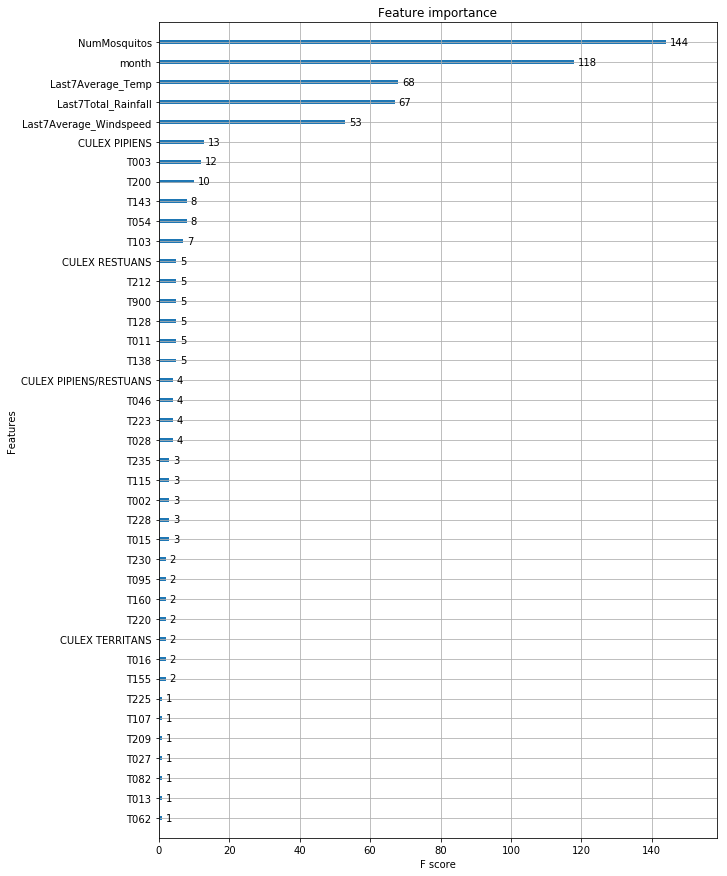

In [44]:
# fit model no training data
xgbc = xgb.XGBClassifier(seed= 42)
xgbc.fit(X, y)
# feature importance
#print(xgb.feature_importances_)

# plot feature importance
fig, ax = pyplot.subplots(figsize=(10, 15))
xgb.plot_importance(xgbc, ax=ax)
pyplot.show()

In [66]:
def calc_roc_auc(y, predict_probs):
    
    """
    Function accepts labels (matrix y) and predicted probabilities
    Function calculates fpr (false positive rate), tpr (true postivies rate), thresholds and auc (area under
    the roc curve)
    Function returns auc
    """
    fpr, tpr, thresholds = roc_curve(y, predict_probs)
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [67]:
def select_features_by_importance_threshold(model, X_train, y_train, selection_model, X_test, y_test,
                                           minimum = False):

    # Fit model using each importance as a threshold
    if minimum:
        thresholds= np.unique(model.feature_importances_[model.feature_importances_ > minimum])
        # include 0 for all features
        thresholds = np.insert(thresholds, 0, 0.)
    else:
        thresholds= np.unique(model.feature_importances_)
        
    
    print(thresholds)
    for thresh in thresholds:
# select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
 # train model
        selection_model = selection_model
        selection_model.fit(select_X_train, y_train)
    # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict_proba(select_X_test)[:,1]
        predictions = y_pred
        #predictions = [round(value) for value in y_pred]
        auc = calc_roc_auc(y_test, predictions)
        print("Thresh=%.3f, n=%d, AUC: %.2f%%" % (thresh, select_X_train.shape[1], auc))


In [73]:
# select_features_by_importance_threshold(xgbc, train_split, label_train_split, 
#                                        xgb.XGBClassifier(seed= 42), val_split, label_val_split)

In [199]:
df_train_II = pd.read_csv('./train_model_2.0.csv')
y = df_train_II['WnvPresent']
dfX = df_train_II.drop('WnvPresent', 1)


In [13]:
df_train_II.head()

,WnvPresent,Last7Average_Temp,Species_fac,Last7Average_Windspeed,Last7Total_Rainfall,Last14Average_Temp,Last14Average_Windspeed,Last14Total_Rainfall,Last7Average_Daylight,Last14Average_Daylight,Last7Average_Departure,Last14Average_Departure,Latitude,Longitude,month,Trap_fac
0,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.954690,-87.800991,5,002
1,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.954690,-87.800991,5,002
2,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.994991,-87.769279,5,007
3,0,67.571429,4,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.974089,-87.824812,5,015
4,0,67.571429,1,10.014286,1.07,63.785714,10.264286,1.66,890.714286,884.357143,5.714286,3.0,41.974089,-87.824812,5,015


# I first ran XG with the sklearn warper but that appears to be hurting performance

In [124]:
# xgbc = xgb.XGBClassifier(seed= 42)
# # fit model no training data
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic'],
#               'learning_rate': [0.05], #so called `eta` value
#               'max_depth': [6],
#               'min_child_weight': [11],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [10,100,1000],
# #               'xgbc_eval_metric':['auc'],
# #               'xgbc_early_stopping_rounds': [10]
#              }
# clf = GridSearchCV(xgbc, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
#                    scoring='roc_auc', refit=True)

# clf.fit(X, y,)
# # xgbc.fit(X, y)
# # feature importance
# #print(xgb.feature_importances_)

# # plot feature importance
# # fig, ax = pyplot.subplots(figsize=(10, 15))
# # xgb.plot_importance(xgbc, ax=ax)
# # pyplot.show()

In [166]:
df_train_II = pd.read_csv('./train_model_2.0.csv')
y = df_train_II['WnvPresent']
dfX = df_train_II.drop('WnvPresent', 1)

In [167]:
dfX['More'] = dfX['More'].fillna(value=0)

In [174]:
dfX['More'].nunique()

2

In [168]:
dtrain = xgb.DMatrix(dfX, label=y)

In [169]:
df_test_II = pd.read_csv('./test_model_2.0.csv')
test_ = df_test_II.drop('Id', 1)

In [170]:
test_['More'] = test_['More'].fillna(value=0)

In [171]:
dtest = xgb.DMatrix(test_)

In [165]:
# test_.head()

In [182]:
# fit model no training data
parameters = {'n_jobs':4, #when use hyperthread, xgboost may become slower
              'objective':'binary:logistic',
               'eta': 0.03, #so called `eta` value
               'max_depth': 6,
               'min_child_weight': 7,
               'silent': 0,
               'subsample': 0.8,
               'colsample_bytree': 0.8,
               'n_estimators': [10,100,1000,10000],
             
             }
# {'objective':'binary:logistic', 'max_depth':2, 'silent':0, 'eta':1}

# #               'xgbc_eval_metric':['auc'],
# #               'xgbc_early_stopping_rounds': [10]
#              }

num_rounds = 10
# eval_metric = ['auc']
# early_stopping_rounds = 25
model = xgb.train(parameters, dtrain, num_rounds)


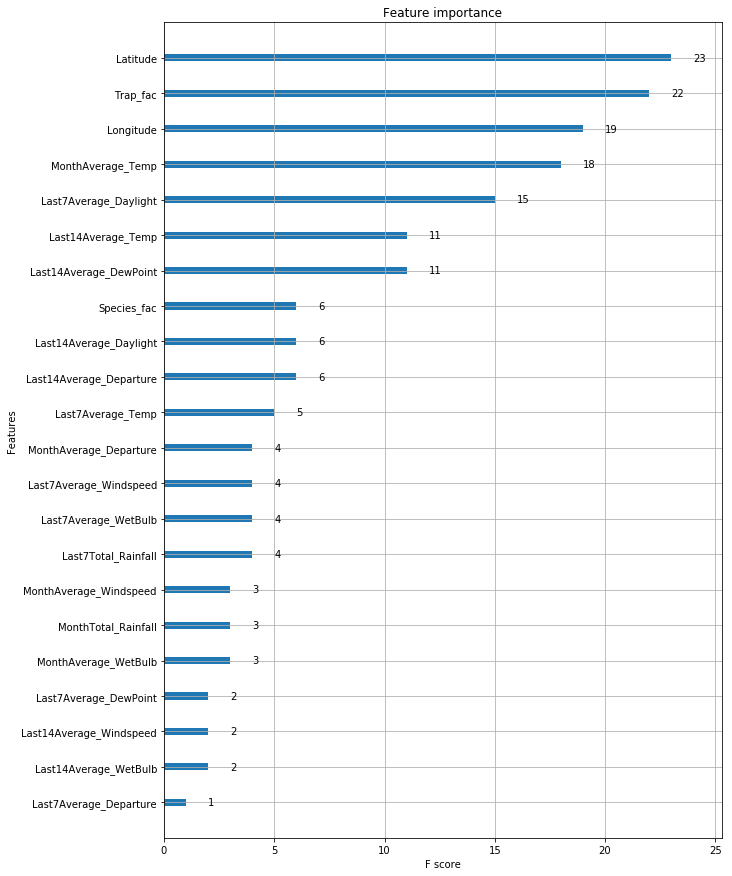

In [183]:
# plot feature importance
fig, ax = pyplot.subplots(figsize=(10, 15))
xgb.plot_importance(model, ax=ax)
pyplot.show()

In [184]:
# train_split, val_split, label_train_split, label_val_split = train_test_split(X,
#                                             y, test_size = 0.33, random_state = 42, stratify= y)
# train_predictions = model.predict_proba(X)[:,1]
train_predictions = model.predict(dtrain)

In [185]:
fpr, tpr, thresholds = roc_curve(y, train_predictions)
roc_auc = auc(fpr, tpr)
    
print roc_auc

0.840721742257


In [131]:
# select_features_by_importance_threshold(xgbc, train_split, label_train_split, 
#                                         xgb.XGBClassifier(seed= 42), val_split, label_val_split)

In [72]:
# select_features_by_importance_threshold(dt, train_split, label_train_split, 
#                                         RandomForestClassifier(random_state= 42), val_split, label_val_split)

In [186]:
submission = pd.DataFrame(df_test_II['Id'], index=None)

In [221]:
submission.head(1000)

,Id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [187]:
predictions = model.predict(dtest)
submission['WnvPresent'] = predictions

In [113]:
# submission.set_index('Id', inplace=True)

In [116]:
submission.head(100)

,Id,WnvPresent
0,1,0.006084
1,2,0.005948
2,3,0.005948
3,4,0.006084
4,5,0.005948
5,6,0.006084
6,7,0.006084
7,8,0.006084
8,9,0.006092
9,10,0.005956


In [188]:
submission.to_csv('submission1.csv', index=False)